In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
os.chdir('../../../')

In [3]:
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"
                                                ] + plt.rcParams["font.serif"]
plt.rcParams['font.size'] = 13
plt.rcParams['figure.dpi'] = 300

In [4]:
os.getcwd()

'/Users/gbemidebe/Documents/GitHub/monsur'

In [5]:
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"
                                                ] + plt.rcParams["font.serif"]
plt.rcParams['font.size'] = 13
plt.rcParams['figure.dpi'] = 300

# The Data

In [6]:
data = pd.read_csv('./data/cleaned_data.csv')
data.head()

,S/N,cDen,Pot,Sn %,pH,weight,Cu %,C2H4,CO,H2,EtoH,FORM
0,1,150,3.5,1.00,14.05,118.7100,0.00,0.00,0.23,0.12,0.00,0.61
1,2,150,3.3,0.80,14.05,107.6772,0.20,0.00,0.23,0.07,0.00,0.66
2,3,150,3.2,0.50,14.05,91.1280,0.50,0.00,0.34,0.05,0.03,0.52
3,4,150,3.1,0.10,14.05,69.0624,0.90,0.01,0.42,0.05,0.02,0.42
4,5,150,3.0,0.05,14.05,66.3042,0.95,0.04,0.48,0.05,0.10,0.19


In [7]:
data.iloc[0]

S/N         1.00
cDen      150.00
Pot         3.50
Sn %        1.00
pH         14.05
weight    118.71
Cu %        0.00
C2H4        0.00
CO          0.23
H2          0.12
EtoH        0.00
FORM        0.61
Name: 0, dtype: float64

In [8]:
data.iloc[5]

S/N         6.00000
cDen      150.00000
Pot         3.00000
Sn %        0.03000
pH         14.05000
weight     65.20092
Cu %        0.97000
C2H4        0.07000
CO          0.50000
H2          0.05000
EtoH        0.11000
FORM        0.14000
Name: 5, dtype: float64

In [9]:
data.max()

S/N        35.00
cDen      450.00
Pot         4.70
Sn %        1.00
pH         14.05
weight    118.71
Cu %        1.00
C2H4        0.37
CO          0.50
H2          0.37
EtoH        0.48
FORM        0.70
dtype: float64

In [10]:
features_col = ['S/N', 'cDen', 'Pot', 'Sn %', 'pH', 'weight', 'Cu %']
target_col = ['C2H4', 'CO', 'H2', 'EtoH', 'FORM']

In [11]:
data[features_col[1:]].max()

cDen      450.00
Pot         4.70
Sn %        1.00
pH         14.05
weight    118.71
Cu %        1.00
dtype: float64

In [12]:
150/450, 3.5/4.70, 1/1, 14.05/14.05, 118.710/118.710

(0.3333333333333333, 0.7446808510638298, 1.0, 1.0, 1.0)

In [13]:
# equation6(Sn_percent=1, Pot=3.5/4.70, weight=18.710/118.710, pH=14.05/14.05, Cu_percent=0, cDen=150/450)

In [14]:
# equation6(Sn_percent=1, Pot=0.744681, weight=1.000000, pH=1.0, Cu_percent=0, cDen=0.333333)*100

In [15]:
data[features_col[1:]] = data[features_col[1:]] / data[features_col[1:]].max()

In [16]:
data.head()

,S/N,cDen,Pot,Sn %,pH,weight,Cu %,C2H4,CO,H2,EtoH,FORM
0,1,0.333333,0.744681,1.00,1.0,1.000000,0.00,0.00,0.23,0.12,0.00,0.61
1,2,0.333333,0.702128,0.80,1.0,0.907061,0.20,0.00,0.23,0.07,0.00,0.66
2,3,0.333333,0.680851,0.50,1.0,0.767652,0.50,0.00,0.34,0.05,0.03,0.52
3,4,0.333333,0.659574,0.10,1.0,0.581774,0.90,0.01,0.42,0.05,0.02,0.42
4,5,0.333333,0.638298,0.05,1.0,0.558539,0.95,0.04,0.48,0.05,0.10,0.19


In [17]:
len(features_col)

7

In [18]:
import numpy as np

def equation1(Sn_percent, weight, pH):
    c0 = 0.3492424242132026
    a0 = -0.3278840906576388
    result = c0 + a0 * (np.cbrt(Sn_percent) + abs(weight - pH))

    return result

def equation2(pH, Pot, Cu_percent, cDen, Sn_percent, weight):
    c0 = -0.001521517168448162
    a0 = -0.07847390026992267
    a1 = 0.562955688069949
    result = c0 + a0 * ((pH - Pot) * (Cu_percent / cDen)) + a1 * abs(np.cbrt(Sn_percent) - weight)

    return result

def equation3(pH, Pot, Cu_percent, cDen, Sn_percent, weight):
    c0 = 0.02235363274912375
    a0 = -0.07776031778427796
    a1 = -0.3259503253435158
    a2 = 0.5593915282365148
    result = c0 + a0 * abs((Pot**3) - abs(Cu_percent - cDen)) + a1 * ((pH - Pot) * abs(Cu_percent - cDen)) + a2 * abs(np.cbrt(Sn_percent) - weight)

    return result

def equation4(pH, Pot, Cu_percent, cDen, Sn_percent):
    c0 = 0.2069561543854506
    a0 = -0.3160577497294035
    a1 = 0.5460642074535786
    a2 = 0.55053684147049
    a3 = -0.2106117548301835
    result = c0 + a0 * ((pH - Pot) * (Cu_percent / cDen)) + a1 * ((Cu_percent / Pot) - (Cu_percent / pH)) + a2 * ((Cu_percent**6) * (Cu_percent - pH)) + a3 * np.cbrt(np.sqrt(Sn_percent))

    return result

def equation5(pH, Pot, Cu_percent, cDen, Sn_percent):
    c0 = 0.1878241997151678
    a0 = 0.1174756564461541
    a1 = -0.3341237620034945
    a2 = 0.5844441048106342
    a3 = 0.5797202325348703
    a4 = -0.2021115822793763
    result = c0 + a0 * abs((pH * Pot) - (cDen / Pot)) + a1 * ((pH - Pot) * (Cu_percent / cDen)) + a2 * ((Cu_percent / Pot) - (Cu_percent / pH)) + a3 * ((Cu_percent**6) * (Cu_percent - pH)) + a4 * np.cbrt(np.sqrt(Sn_percent))

    return result

def equation6(Sn_percent, Pot, weight, pH, Cu_percent, cDen):
    c0 = -0.004914360452691078
    a0 = -0.2066222976907354
    a1 = 0.5316870806624426
    a2 = -0.3948118857569158
    a3 = 0.7149525683414504
    a4 = 0.620296271014388
    a5 = -0.3429464114810739
    result = c0 + a0 * abs((Sn_percent / Pot) - (weight**3)) + a1 * abs((pH * Pot) - np.sqrt(cDen)) + a2 * ((pH - Pot) * (Cu_percent / cDen)) + a3 * ((Cu_percent / Pot) - (Cu_percent / pH)) + a4 * ((Cu_percent**6) * (Cu_percent - pH)) + a5 * (np.cbrt(Sn_percent) - np.cos(Cu_percent))

    return result


In [19]:
equation6(Sn_percent=1, Pot=0.744681, weight=1.000000, pH=1.0, Cu_percent=0, cDen=0.333333)*100

1.3211505657878861

In [20]:
data['C2H4_pred_1'] = equation1(data['Sn %'], data['weight'], data['pH'])
data['C2H4_pred_2'] = equation2(data['pH'], data['Pot'], data['Cu %'], data['cDen'], data['Sn %'], data['weight'])
data['C2H4_pred_3'] = equation3(data['pH'], data['Pot'], data['Cu %'], data['cDen'], data['Sn %'], data['weight'])
data['C2H4_pred_4'] = equation4(data['pH'], data['Pot'], data['Cu %'], data['cDen'], data['Sn %'])
data['C2H4_pred_5'] = equation5(data['pH'], data['Pot'], data['Cu %'], data['cDen'], data['Sn %'])
data['C2H4_pred_6'] = equation6(data['Sn %'], data['Pot'], data['weight'], data['pH'], data['Cu %'], data['cDen'])
data.head()

,S/N,cDen,Pot,Sn %,pH,weight,Cu %,C2H4,CO,H2,EtoH,FORM,C2H4_pred_1,C2H4_pred_2,C2H4_pred_3,C2H4_pred_4,C2H4_pred_5,C2H4_pred_6
0,1,0.333333,0.744681,1.00,1.0,1.000000,0.00,0.00,0.23,0.12,0.00,0.61,0.021358,-0.001522,-0.011579,-0.003656,0.020610,0.013211
1,2,0.333333,0.702128,0.80,1.0,0.907061,0.20,0.00,0.23,0.07,0.00,0.66,0.014389,-0.003580,0.004751,-0.006149,0.009647,-0.011979
2,3,0.333333,0.680851,0.50,1.0,0.767652,0.50,0.00,0.34,0.05,0.03,0.52,0.012818,-0.024425,0.008005,-0.008299,0.002730,-0.005671
3,4,0.333333,0.659574,0.10,1.0,0.581774,0.90,0.01,0.42,0.05,0.02,0.42,0.059922,-0.007439,0.003517,-0.002638,0.001807,0.019693
4,5,0.333333,0.638298,0.05,1.0,0.558539,0.95,0.04,0.48,0.05,0.10,0.19,0.083701,0.024622,0.028281,0.027044,0.027673,0.035909


In [21]:
data.iloc[5]

S/N            6.000000
cDen           0.333333
Pot            0.638298
Sn %           0.030000
pH             1.000000
weight         0.549245
Cu %           0.970000
C2H4           0.070000
CO             0.500000
H2             0.050000
EtoH           0.110000
FORM           0.140000
C2H4_pred_1    0.099566
C2H4_pred_2    0.050158
C2H4_pred_3    0.051435
C2H4_pred_4    0.043284
C2H4_pred_5    0.043878
C2H4_pred_6    0.052197
Name: 5, dtype: float64

In [22]:
from src.plotter import plot_data

In [23]:
def percentage_mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred)) * 100

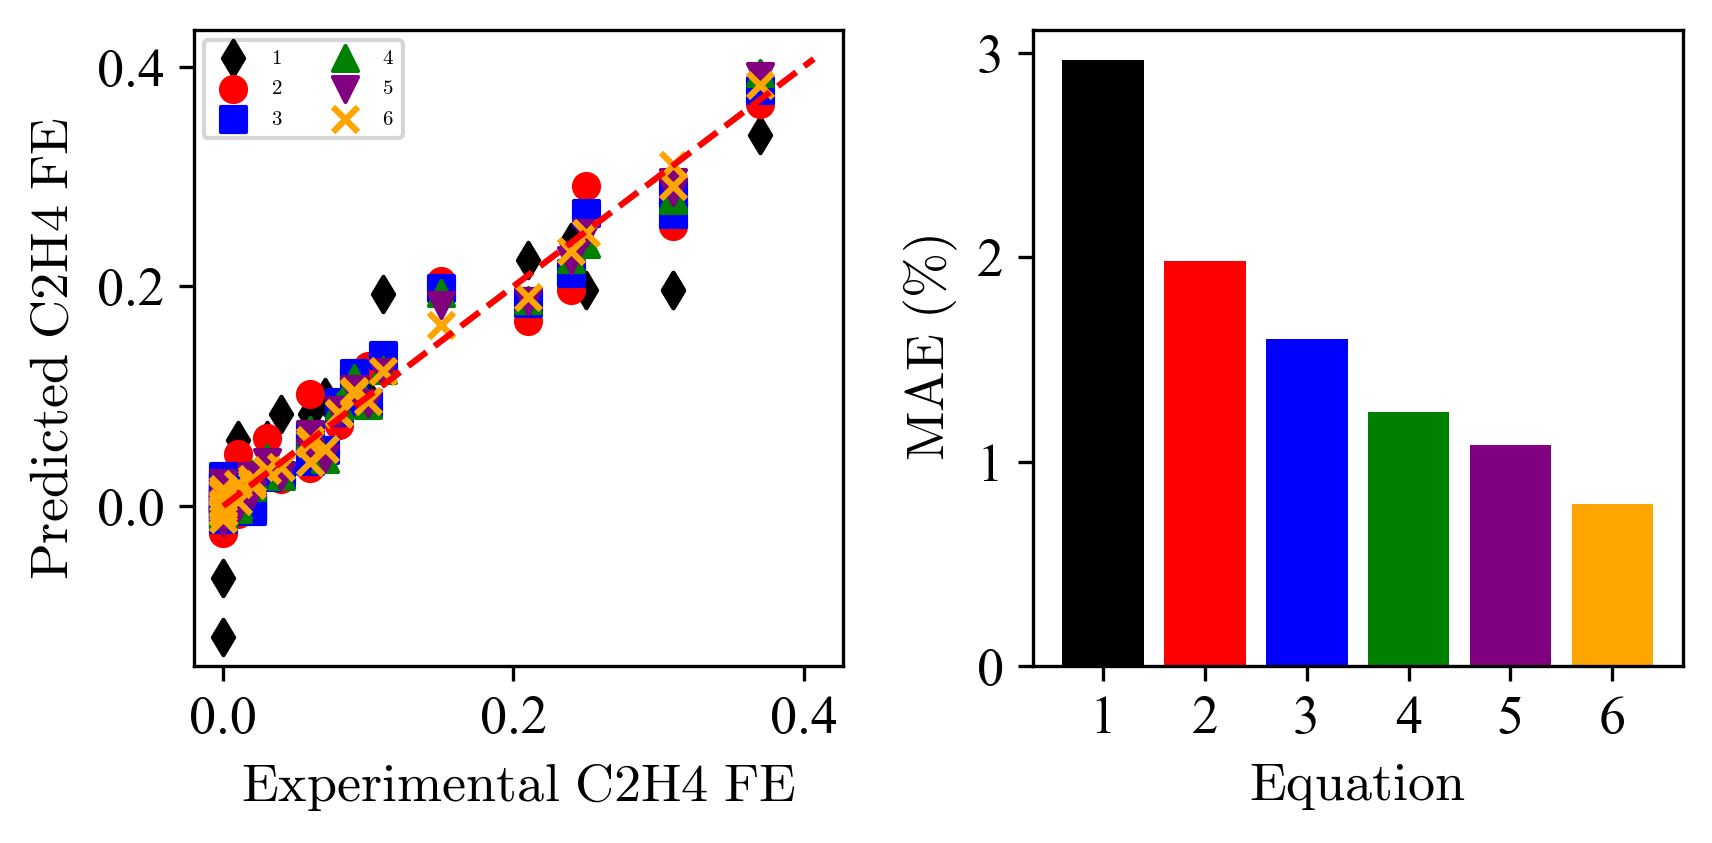

In [24]:
plot_data(data, metric=percentage_mae, metric_name='MAE', name='C2H4', pred_name='C2H4_pred', title='C2H4', figsize=(6, 4))

Text(0, 0.5, '$\\rm Predicted \\ C2H4 \\ FE$')

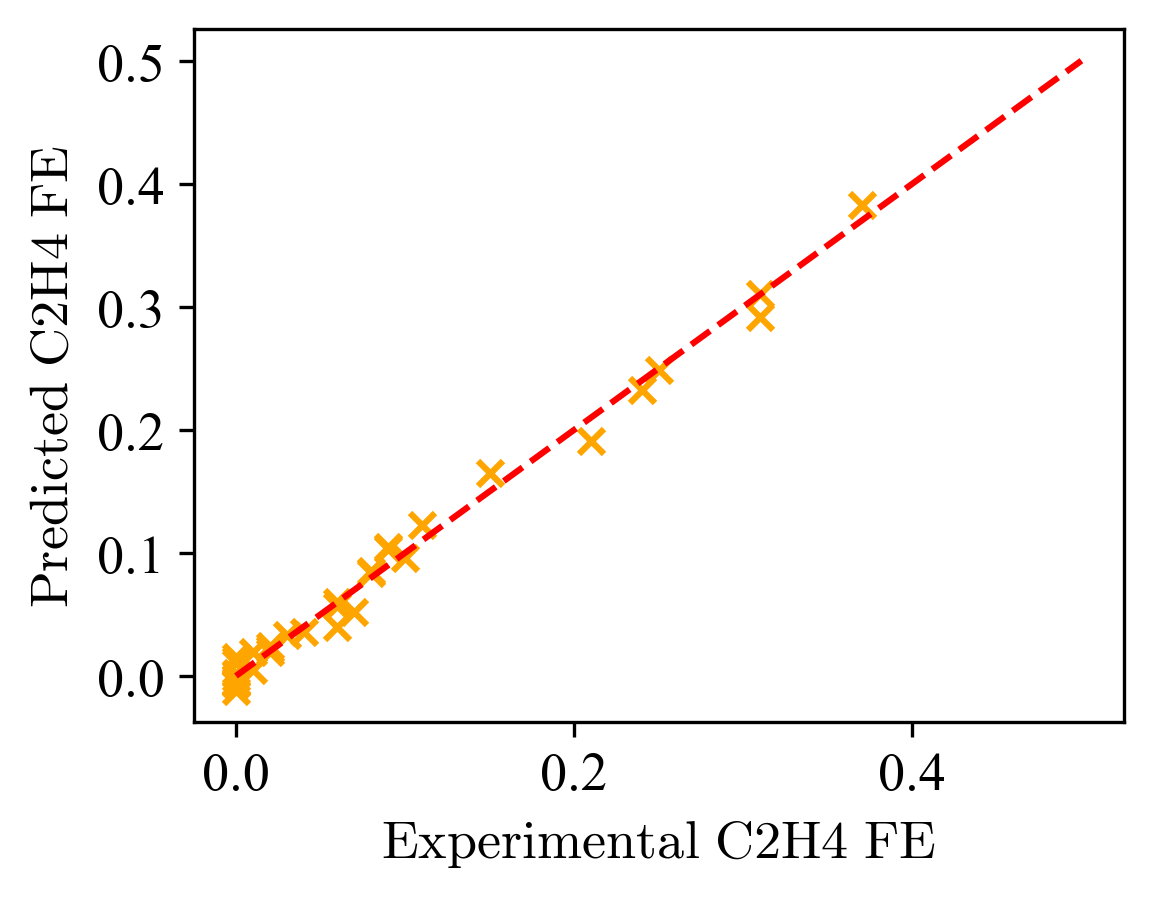

In [25]:
plt.figure(figsize=(4, 3))
plt.scatter(data['C2H4'], data['C2H4_pred_6'], label=r'$\rm Eqn 6$', marker='x', color='orange')
plt.plot([0, 0.5], [0, 0.5], color='red', linestyle='--')

plt.xlabel(r'$\rm Experimental \ C2H4 \ FE$')
plt.ylabel(r'$\rm Predicted \ C2H4 \ FE$')

# plt.legend()